# Model fitting and predictions
Now, I will start with the fitting of the data to the RandomForests model to then evaluate it's performance

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("data/pre_processed.csv")
data.head(5)

,Duration,Amount,Installment_Rate,Residence_Years,Age,Existing_Credits,Num_People_Liable,Status_A12,Status_A13,Status_A14,...,Other_Installments_A142,Other_Installments_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_Worker_A202,Target
0,6,1169,4,4,67,2,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,1,0,1,0,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [2]:
y = data["Target"]

X = data.copy()
X = data.drop("Target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [3]:
rf = RandomForestClassifier(random_state=0, class_weight={0: 1, 1: 5})

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy': 'accuracy', 
           'precision': 'precision', 
           'recall': 'recall', 
           'f1': 'f1'}

#rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [4]:
rf.fit(X_train, y_train)
#rf_cv.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=0)

In [5]:
#print("Best hyperparameters found:")
#print(rf_cv.best_params_)

In [6]:
y_test_pred = rf.predict(X_test)
#y_test_pred = rf_cv.best_estimator_.predict(X_test)


accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')  # Usa 'macro' si las clases están balanceadas
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Evaluación en el conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Evaluación en el conjunto de prueba:
Accuracy: 0.7633
Precision: 0.7556
Recall: 0.7633
F1 Score: 0.7334


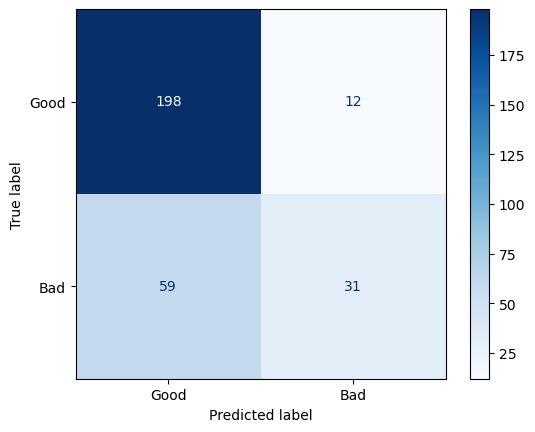

In [7]:
cm = confusion_matrix(y_test, y_test_pred)
labels = ['Good', 'Bad']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')